# EDA Insurance Data Analysis

## Problem Statement: 
An insurance agency, ABC Insurance, has a large dataset containing information about their policyholders and claims. They want to perform exploratory data analysis (EDA) on this dataset to gain insights that can help them make better business decisions and improve their operations. 

The agency wants to analyze the different body types and the environment that affect the premium. The disease's effect or the cost of treatment differs depending on the circumstances. For example, a smoker's medical insurance premium may be higher than that of a healthy person, because smokers are more likely to develop chronic diseases. The agency wants to analyze the data to research healthcare premium costs.

## Objective:
- To analyze the dataset that will help to create a model that will predict the cost of medical insurance based on various input features

**Domain**: Healthcare

**Dataset**: insurance dataset (insurance.csv)

## 1. Data Collection

### Dataset Description:

|**age**|	Age of the person|
|---|---|
|**sex**|	Female or Male|
|**BMI**|	BMI value to estimate an individual's health and fitness condition|
|**children**|	number of children (1,2,3,4, or 5)|
|**smoker**|	The person is a smoker or not|
|**region**|	Specifies the region (northeast, northwest, southeast, southwest)|
|**charges**|	the amount of insurance|



In [1]:
# import libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# import dataset

df = pd.read_csv('./dataset/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
# check the shape of the dataset

df.shape

(1338, 7)

In [4]:
# check the info of the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
# chech missing values

df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

We can see that there are no missing values in the dataset. However, there are some object type columns in the dataset. We need to convert them to categorical variables.

In [6]:
# first we need to check the unique values in categorical columns

df.sex.unique()

array(['female', 'male'], dtype=object)

In [7]:
df.smoker.unique()

array(['yes', 'no'], dtype=object)

In [8]:
df.region.unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [10]:
# check for the duplicate values

df.duplicated().sum()

1

There is one duplicate value in the dataset.

In [11]:
# get the index of the duplicate value

df[df.duplicated()].index

Index([581], dtype='int64')

In [12]:
duplicates = df[df.duplicated(keep=False)]
duplicates


,age,sex,bmi,children,smoker,region,charges
195,19,male,30.59,0,no,northwest,1639.5631
581,19,male,30.59,0,no,northwest,1639.5631


In [13]:
df.drop(duplicates.index, inplace=True)
df.duplicated().sum()

0

Now the dataset is clean.

## 2. Data Exploration

Explore the data and find the insights from the data.

Let us explore the relationship between the feature and target column using a count plot of categorical columns and a scatter plot of numerical columns.

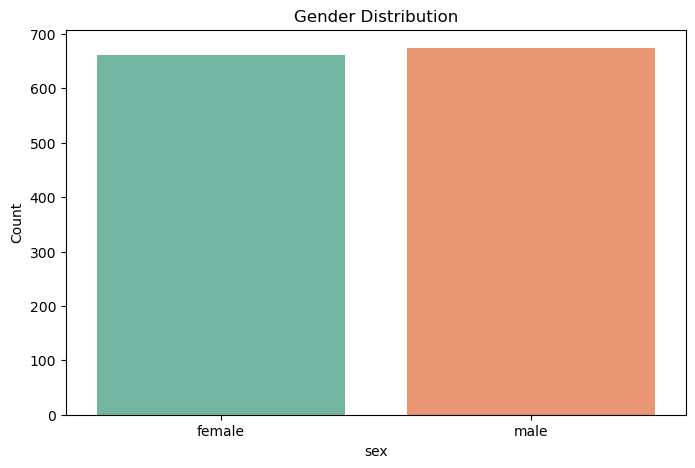

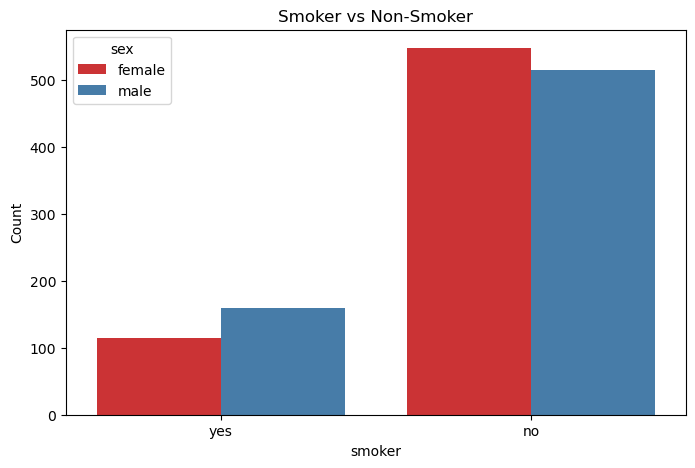

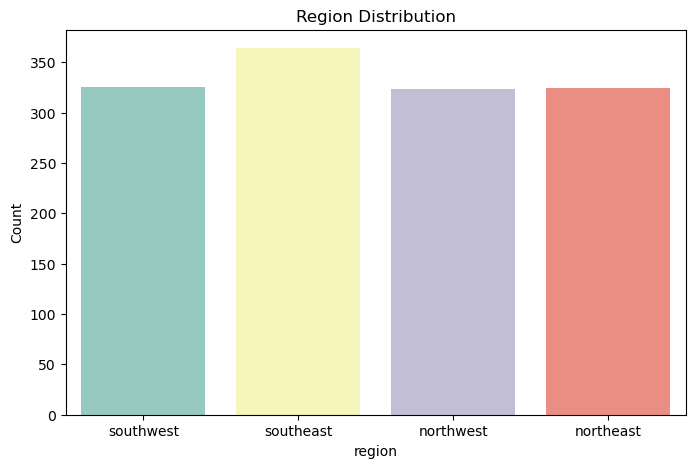

In [14]:
# Categorical Column Analysis
def plot_count(column, title, set_value, hue=None, legend=False):
    plt.figure(figsize=(8, 5))
    sns.countplot(data=df, x=column, palette=set_value, hue=hue if hue else column, legend=legend)
    plt.title(title)
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.show()

plot_count('sex', 'Gender Distribution', 'Set2')
plot_count('smoker', 'Smoker vs Non-Smoker', 'Set1', hue='sex', legend=True)
plot_count('region', 'Region Distribution', 'Set3')

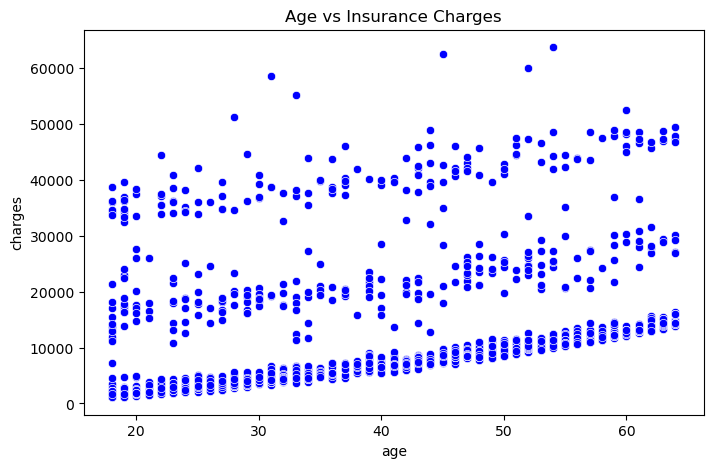

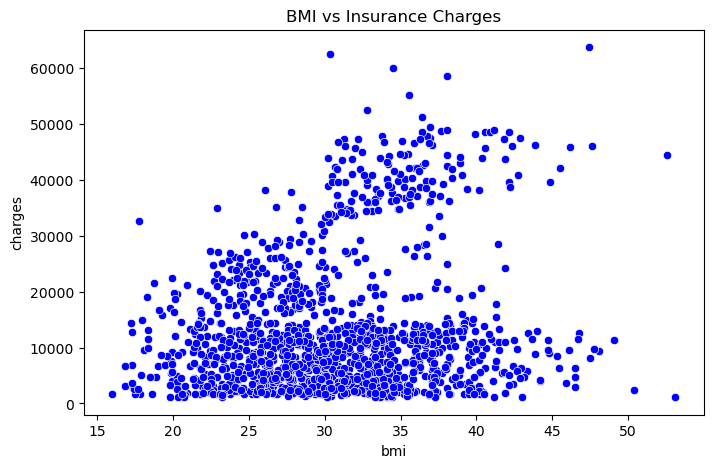

In [15]:
# Numerical Column Analysis
def plot_scatter(x_col, y_col, title):
    plt.figure(figsize=(8, 5))
    sns.scatterplot(data=df, x=x_col, y=y_col, color='blue')
    plt.title(title)
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.show()

plot_scatter('age', 'charges', 'Age vs Insurance Charges')
plot_scatter('bmi', 'charges', 'BMI vs Insurance Charges')

In [16]:
#convert categorical data to numerical data

df['sex'] = df['sex'].map({'female': 0, 'male': 1})
df['smoker'] = df['smoker'].map({'no': 0, 'yes': 1})
df['region'] = df['region'].map({'southwest': 0, 'southeast': 1, 'northwest': 2, 'northeast': 3})
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,0,16884.92400
1,18,1,33.770,1,0,1,1725.55230
2,28,1,33.000,3,0,1,4449.46200
3,33,1,22.705,0,0,2,21984.47061
4,32,1,28.880,0,0,2,3866.85520


### Correlation matrix.

In [17]:
# let us see the correlation matrix

corr = df.corr()
corr

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.018767,0.109416,0.040600,-0.026157,-0.001124,0.297606
sex,-0.018767,1.000000,0.046423,0.018534,0.077008,-0.005285,0.058799
bmi,0.109416,0.046423,1.000000,0.012750,0.003742,-0.157583,0.198461
children,0.040600,0.018534,0.012750,1.000000,0.006989,-0.015947,0.066779
smoker,-0.026157,0.077008,0.003742,0.006989,1.000000,0.002536,0.787217
region,-0.001124,-0.005285,-0.157583,-0.015947,0.002536,1.000000,0.006886
charges,0.297606,0.058799,0.198461,0.066779,0.787217,0.006886,1.000000


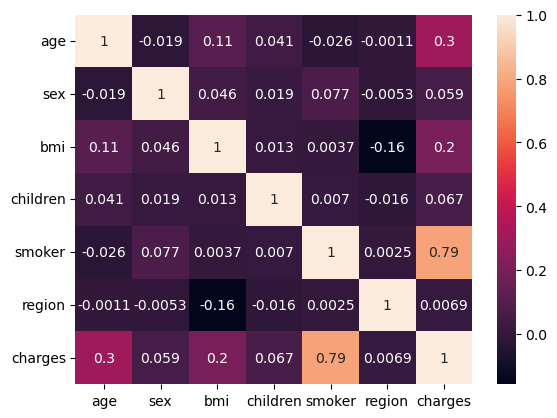

In [18]:
# correlation matrix plot

import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(corr, annot=True)
plt.show()

### Observations of the correlation matrix:

Correlation with charges (target variable):
- **smoker**:
    - Correlation = 0.787
    - This is a very strong positive correlation, indicating that smoking status has a significant impact on insurance charges. Smokers are likely to incur higher medical costs.
- **age**:
    - Correlation = 0.298
    - There is a moderate positive correlation between age and charges. Older individuals tend to have higher insurance premiums, possibly due to increased health risks with age.
- **bmi**:
    - Correlation = 0.198
    -There is a weak positive correlation between BMI and charges. Higher BMI (which can be associated with obesity) might lead to higher medical expenses.
- **children**, **sex**, **region**:
    - here are the remaining variables where the correlation is very weak (close to 0), suggesting that these variables have little to no linear impact on charges.


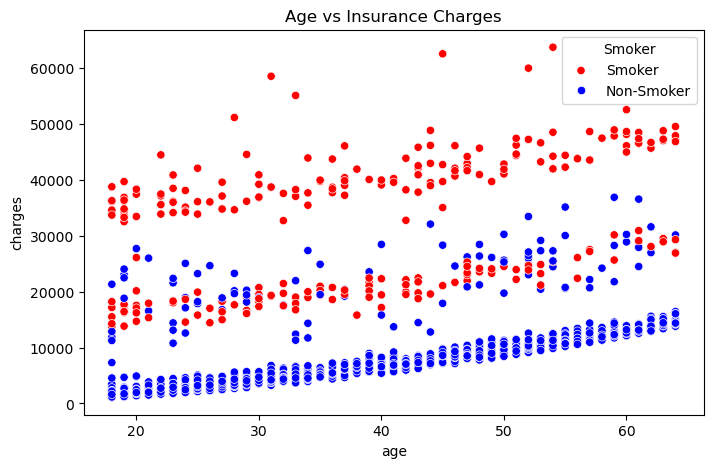

In [38]:
# Let the see the relashionsip between age, smoker and charges

# Numerical Column Analysis
def plot_scatter(x_col, y_col, title):
    plt.figure(figsize=(8, 5))
    sns.scatterplot(
        data=df,
        x=x_col,
        y=y_col,
        hue='smoker',
        palette={
            0: 'blue',
            1: 'red'
            })
    plt.title(title)
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.legend(title='Smoker', labels=['Smoker', 'Non-Smoker'])
    plt.show()

plot_scatter('age', 'charges', 'Age vs Insurance Charges')

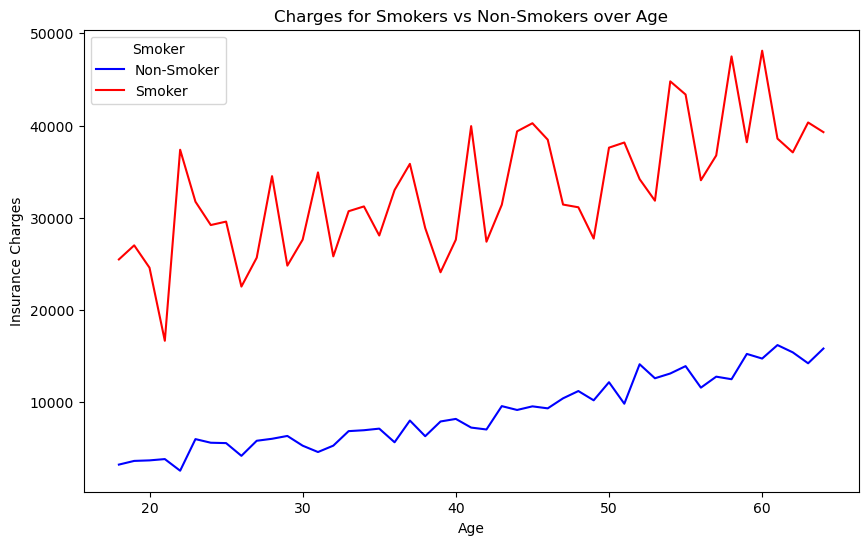

In [ ]:
# Premium Charges for Smokers vs Non-Smokers over Age
plt.figure(figsize=(10, 6))
sns.lineplot(data=df,
             x='age',
             y='charges',
             hue='smoker',
             errorbar=None,
             palette={
                 0: 'blue',
                 1: 'red'
             })
plt.title('Charges for Smokers vs Non-Smokers over Age')
plt.xlabel('Age')
plt.ylabel('Insurance Charges')
plt.legend(title='Smoker', labels=['Non-Smoker', 'Smoker'])
plt.show()

## 3. Final Observations

- **Premium Charges**
  - Across all age categories, smoking significantly raises insurance costs. The premiums paid by smokers are consistently greater than those of non-smokers.
- **Age Factor**
  - Because older age is associated with a higher risk, insurance rates rise with age for both smokers and non-smokers.
  - As people age, smoking increases the risk factors that insurers take into account, as evidenced by the growing disparity in rates between smokers and non-smokers.
- **Significant Difference in Premium Charges for Smokers and Non-Smokers**
  - The analysis highlights the strong influence of smoking on insurance premiums, suggesting that quitting smoking could result in lower premiums.
